In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

In [50]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [51]:
f = h5py.File('400_512_f32.h5', 'r')
head = f.attrs

In [52]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [53]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [54]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [55]:
d  = f['density'][:]
GE = f['GasEnergy'][:]
px  = f['momentum_x'][:]
py = f['momentum_y'][:]
pz = f['momentum_z'][:]

In [56]:
f.close()

In [57]:
km = 1e-5

Vx = (px*v_c*km)/d #velocity in the x direction
Vy = (py*v_c*km)/d #velocity in the y direction
Vz = (pz*v_c*km)/d #velocity in the z direction

In [58]:
print(np.min(Vx), np.max(Vx))

-85.37287818438907 1352.2912121524512


In [59]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [60]:
T = GE*(gamma - 1.0)*p_c / (n*kb) #Temperature

In [61]:
print(np.min(n), np.max(n))

0.0005536265089176595 275.3681335449219


In [62]:
## Masking
n_clouds = np.where(T<2e4, n, 10e-10)
n_int = np.where((T >= 2e4) & (T <= 5e5), n, 10e-10)
n_wind = np.where(T>5e5, n, 10e-10)

In [63]:
n_clouds_x = np.log10(np.sum(n_clouds, axis=0)*dx*l_c)
n_clouds_y = np.log10(np.sum(n_clouds, axis=1)*dx*l_c)
n_clouds_z = np.log10(np.sum(n_clouds, axis=2)*dx*l_c)

In [64]:
n_int_x = np.log10(np.sum(n_int, axis=0)*dx*l_c)
n_int_y = np.log10(np.sum(n_int, axis=1)*dx*l_c)
n_int_z = np.log10(np.sum(n_int, axis=2)*dx*l_c)

In [65]:
n_wind_x = np.log10(np.sum(n_wind, axis=0)*dx*l_c)
n_wind_y = np.log10(np.sum(n_wind, axis=1)*dx*l_c)
n_wind_z = np.log10(np.sum(n_wind, axis=2)*dx*l_c)

In [66]:
Vx_clouds = np.where(T<2e4, Vx, np.NaN)
Vx_int = np.where((T >= 2e4) & (T <= 5e5), Vx, np.NaN)
Vx_wind = np.where(T>5e5, Vx, np.NaN)

In [67]:
Vy_clouds = np.where(T<2e4, Vy, np.NaN)
Vy_int = np.where((T >= 2e4) & (T <= 5e5), Vy, np.NaN)
Vy_wind = np.where(T>5e5, Vy, np.NaN)

In [68]:
Vz_clouds = np.where(T<2e4, Vz, np.NaN)
Vz_int = np.where((T >= 2e4) & (T <= 5e5), Vz, np.NaN)
Vz_wind = np.where(T>5e5, Vz, np.NaN)

<h2>Cloud</h2>

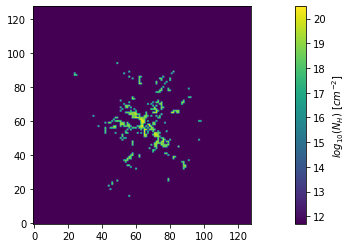

In [69]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

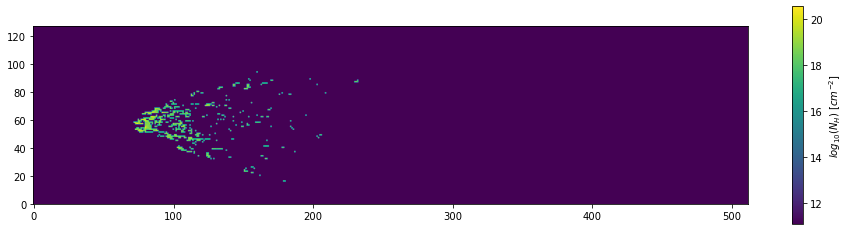

In [70]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Intermediate Gas</h2>

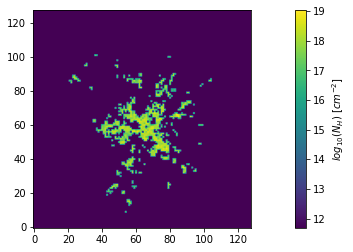

In [71]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

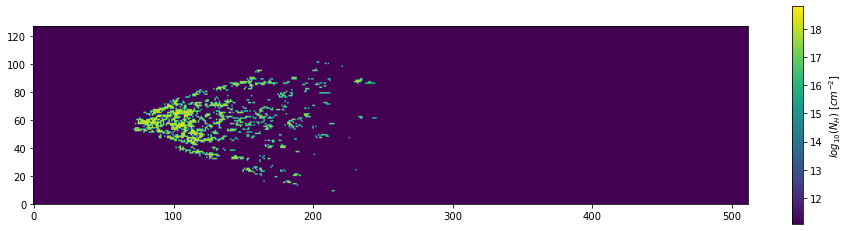

In [72]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_int_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Wind<h2>

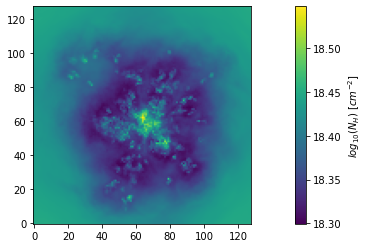

In [73]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_x.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

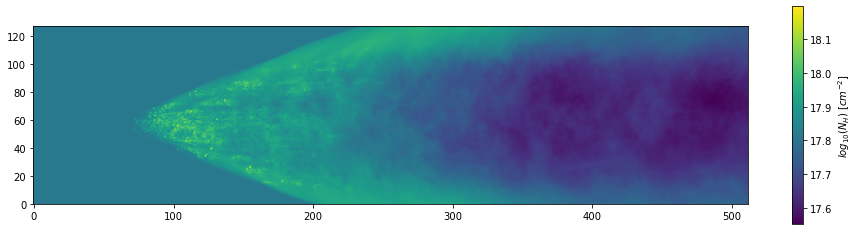

In [74]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_wind_y.T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Colorblocking the Phases</h2>

In [75]:
## use np.where() with only the condition so that it returns only indices
## I don't think this can work for projections, so need to know c.o.m. of cloud

In [76]:
n_clouds = np.where(T<2e4, n, 0)
com = ndimage.center_of_mass(n_clouds)
com

(93.4886083651706, 66.1094175796655, 57.431660097421776)

In [77]:
cmap = colors.ListedColormap(['blue', 'purple','red'])
bounds=[0,2e4,5e5,np.inf]
norm = colors.BoundaryNorm(bounds, cmap.N)

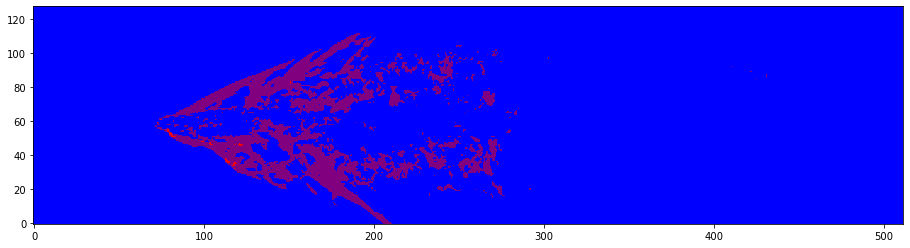

In [78]:
figure = plt.figure(figsize=(16,4))
image = plt.imshow(T[:,int(ny/2),:].T, origin='lower', cmap=cmap)

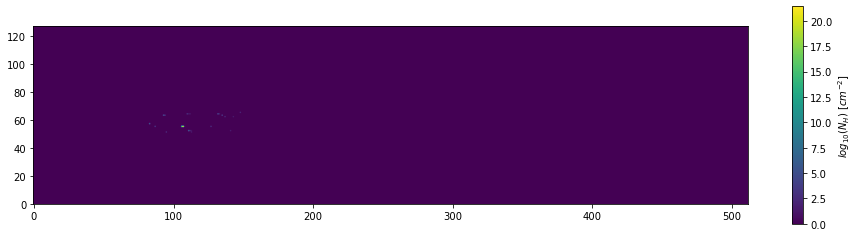

In [94]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[:,int(com[1]),:].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

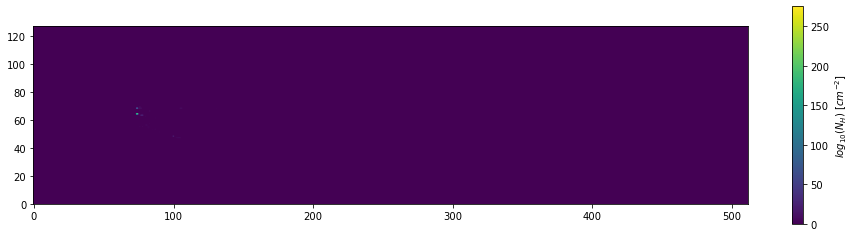

In [95]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[:,:,int(com[2])].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

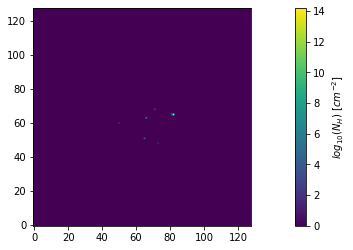

In [96]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(n_clouds[int(com[0]),:,:].T, origin='lower', cmap='viridis')
cb = plt.colorbar(image, label='$log_{10}(N_{H})$ [$cm^{-2}$]')

<h2>Cloud Stats</h2>

In [79]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_clouds), " km/s")
print("Median: ", np.nanmedian(Vx_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_clouds, 90), " km/s")

X Direction Velocities
Mean:  114.69125413609363  km/s
Median:  102.39203769275562  km/s
75th Percentile:  141.8360753721671  km/s
90th Percentile:  188.55993336089543  km/s


In [80]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_clouds), " km/s")
print("Median: ", np.nanmedian(Vy_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_clouds, 90), " km/s")

Y Direction Velocities
Mean:  2.0452476570163536  km/s
Median:  2.2983759792513285  km/s
75th Percentile:  10.946202986867148  km/s
90th Percentile:  18.890761340796015  km/s


In [81]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_clouds), " km/s")
print("Median: ", np.nanmedian(Vz_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_clouds, 90), " km/s")

Z Direction Velocities
Mean:  -3.587254710225843  km/s
Median:  -2.5010120595853844  km/s
75th Percentile:  6.114232290389772  km/s
90th Percentile:  17.60758925358417  km/s


In [82]:
V_clouds = np.sqrt(np.power(Vx_clouds, 2) + np.power(Vy_clouds, 2) + np.power(Vz_clouds, 2))

In [83]:
print("Speeds")

print("Mean: ", np.nanmean(V_clouds), " km/s")
print("Median: ", np.nanmedian(V_clouds), " km/s")
print("75th Percentile: ", np.nanpercentile(V_clouds, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_clouds, 90), " km/s")

Speeds
Mean:  116.77159858231434  km/s
Median:  105.19832133264042  km/s
75th Percentile:  144.15159473761005  km/s
90th Percentile:  190.01581457845592  km/s


<h2>Intermediate Gas Stats</h2>

In [84]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_int), " km/s")
print("Median: ", np.nanmedian(Vx_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_int, 90), " km/s")

X Direction Velocities
Mean:  179.50178311611575  km/s
Median:  165.25836659083325  km/s
75th Percentile:  223.3896180680171  km/s
90th Percentile:  279.2213620404218  km/s


In [85]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_int), " km/s")
print("Median: ", np.nanmedian(Vy_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_int, 90), " km/s")

Y Direction Velocities
Mean:  1.1819569197729243  km/s
Median:  0.13411965503798706  km/s
75th Percentile:  16.117378956528203  km/s
90th Percentile:  33.38497932142829  km/s


In [86]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_int), " km/s")
print("Median: ", np.nanmedian(Vz_int), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_int, 90), " km/s")

Z Direction Velocities
Mean:  -2.744014007896194  km/s
Median:  -2.07473058405256  km/s
75th Percentile:  13.559145758447515  km/s
90th Percentile:  27.63920158809352  km/s


In [87]:
V_int = np.sqrt(np.power(Vx_int, 2) + np.power(Vy_int, 2) + np.power(Vz_int, 2))

In [88]:
print("Speeds")

print("Mean: ", np.nanmean(V_int), " km/s")
print("Median: ", np.nanmedian(V_int), " km/s")
print("75th Percentile: ", np.nanpercentile(V_int, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_int, 90), " km/s")

Speeds
Mean:  183.19413776372352  km/s
Median:  169.35128220388543  km/s
75th Percentile:  225.99439579471792  km/s
90th Percentile:  281.44496820702955  km/s


<h2>Wind Stats</h2>

In [89]:
print("X Direction Velocities")

print("Mean: ", np.nanmean(Vx_wind), " km/s")
print("Median: ", np.nanmedian(Vx_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vx_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vx_wind, 90), " km/s")

X Direction Velocities
Mean:  1099.5087708330218  km/s
Median:  1183.3211758876341  km/s
75th Percentile:  1196.1815492614835  km/s
90th Percentile:  1196.1871559661256  km/s


In [90]:
print("Y Direction Velocities")

print("Mean: ", np.nanmean(Vy_wind), " km/s")
print("Median: ", np.nanmedian(Vy_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vy_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vy_wind, 90), " km/s")

Y Direction Velocities
Mean:  -0.3663098071708709  km/s
Median:  -2.970784727072295e-14  km/s
75th Percentile:  10.361494020963638  km/s
90th Percentile:  55.46978392271557  km/s


In [91]:
print("Z Direction Velocities")

print("Mean: ", np.nanmean(Vz_wind), " km/s")
print("Median: ", np.nanmedian(Vz_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(Vz_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(Vz_wind, 90), " km/s")

Z Direction Velocities
Mean:  0.1852813376792651  km/s
Median:  1.2539922542849199e-14  km/s
75th Percentile:  11.151992388547963  km/s
90th Percentile:  54.56829071137374  km/s


In [92]:
V_wind = np.sqrt(np.power(Vx_wind, 2) + np.power(Vy_wind, 2) + np.power(Vz_wind, 2))

In [93]:
print("Speeds")

print("Mean: ", np.nanmean(V_wind), " km/s")
print("Median: ", np.nanmedian(V_wind), " km/s")
print("75th Percentile: ", np.nanpercentile(V_wind, 75), " km/s")
print("90th Percentile: ", np.nanpercentile(V_wind, 90), " km/s")

Speeds
Mean:  1102.0573003372199  km/s
Median:  1184.3773071364349  km/s
75th Percentile:  1196.181655047877  km/s
90th Percentile:  1196.1872617535107  km/s
